Logisitic regression solve the classification problem. \
We have binary classificaiton, where we can have two answer like yes(0) and no (1). \
for multiclass clasification, we have multiple answer for multiple part. 

sigmoid(z) = 1/(1+ e^-z) \
from linear regression we know that> y = mx+c \
to get the s shaped equation and get the maximum amount of correct data \
we do logisitic regression and we get the s-shpae line.\
equation also change as z  = y \
**sigmoid(z) = 1/(1+ e^-(mx+c))**

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


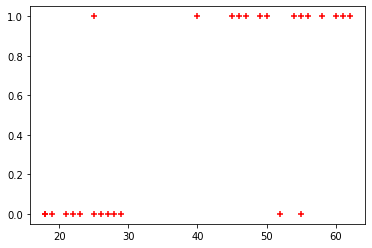

In [26]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red') # see the data distribution.

In [27]:
df.shape # 27 rows and 2 columns.

(27, 2)

In [28]:
from sklearn.model_selection import train_test_split


**Split the data**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)
# 1st parameter x or age independent, 2nd parameter bought_insurence is the dependent parameter.

**Feed the data to your model**

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# feeding data
model.fit(X_train, y_train)

LogisticRegression()

**Predict**

In [31]:
model.predict(X_test)

array([0, 1, 1, 1, 0, 1])

**Accuracy**

In [32]:
model.score(X_test,y_test)

0.8333333333333334

**Probabilty of each customer buying any insurence**

In [33]:
model.predict_proba(X_test)

array([[0.77108594, 0.22891406],
       [0.20906382, 0.79093618],
       [0.14434008, 0.85565992],
       [0.06428726, 0.93571274],
       [0.89213138, 0.10786862],
       [0.18538432, 0.81461568]])

# **Exercise**

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)\
2. Plot bar charts showing impact of employee salaries on retention \
3. Plot bar charts showing corelation between department and employee retention \
4. Now build logistic regression model using variables that were narrowed down in step 1 \
5. Measure the accuracy of the model

In [38]:
df = pd.read_csv("HR_comma_sep.csv")
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


Ans 1 : \
Employee retention is defined as an organization's ability to prevent employee turnover, or the number of people who leave their job in a certain period, either voluntarily or involuntarily.

In [39]:
df.shape #  total rows = 14999, column = 10

(14999, 10)

In [40]:
left = df[df.left==1]
print("Number of people left :",left.shape) # 3571

Number of people left : (3571, 10)


In [42]:
retained = df[df.left==0]
print("Number of people left :",retained.shape) # 3571

Number of people left : (11428, 10)


In [43]:
df.groupby('left').mean() # 1 means left , 0 means left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From the above table we can understand that,\
**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66) \
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207) \
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

**Impact of salary on employee retention**



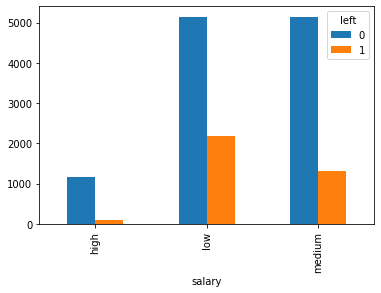

In [44]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

**Department wise employee retention rate**

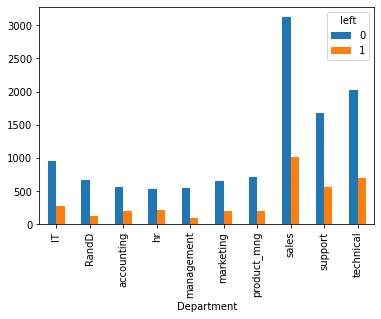

In [45]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

From the data analysis so far we can conclude that we will use following variables as independant variables in our model
**Satisfaction Level**,
**Average Monthly Hours**,
**Promotion Last 5 Years**,
**Salary**.

In [46]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


**Tackle salary dummy variable** \
Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables

In [47]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns') # concating the dummy data
df_with_dummies.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [48]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [49]:
# dependent
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [52]:
# independent
y = df.left


**Split the data**

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

**Training**

In [55]:
model.fit(X_train, y_train)

LogisticRegression()

**predict**

In [56]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

**Accuracy of the model**



In [57]:
model.score(X_test,y_test)

0.7774285714285715